<img src="https://raw.githubusercontent.com/HooshBaaz/2022_DataAnalytics_SummerSchool/main/assets/logo3.png" width="200" height="200" >

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day3 - HandsOn2: Muli Label Classification & Imbalance Data</b></font><br>
        <hr/>

</div>

<pre>
.
── Dataset
│
├── One vs One Classification
│
├── One vs Rest Classification
├
├── ROC/AUC
│
├── Different Models Performance
│ 
├── Dealing with Imbalance Data
│
└── Effect of Over-Sampling and Under Sampling
</pre>

The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado, let's get started!
______________________________________

## Import Modules/Libraries

In [267]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

_______________________

## Dataset

Before doing anything, we need to get familiar with Dataset. In this HandsON, we will focus on the standard imbalanced multi-class classification problem referred to as “Glass Identification” or simply `glass`. The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. Ignoring the sample identification number, there are nine input variables that summarize the properties of the glass dataset; they are:

- RI: Refractive Index
- Na: Sodium
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

The chemical compositions are measured as the weight percent in corresponding oxide.

### 📖 Read Dataset and Exploration
In this section we are going to read the dataset and have some visualizations to explore the dataset.

#### 💭 Questions
- Read the dataset `glass.csv` considering column names which are explaiend before and use the name `Label` for the target column.
- plot count of each label by choosing a proper plot. can you explain what is the problem in this dataset?


**Write the answer below:** 


In [268]:
# Read csv data
df = pd.read_csv('glass.csv')
df = df.rename(columns={'1': 'Label'})
df

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,Label
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


<AxesSubplot:>

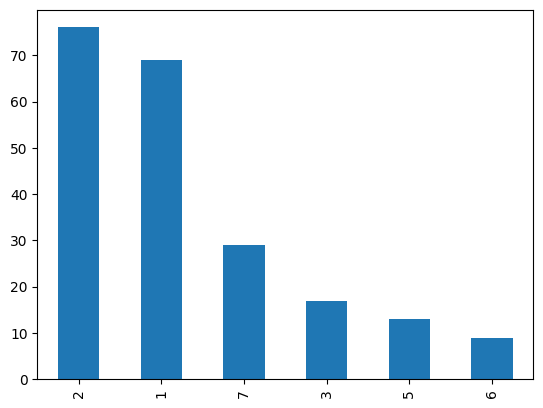

In [269]:
# plot count of each label
df['Label'].value_counts().plot(kind='bar')

__________________________

## One vs One Classification

Unlike the dataset that you work on in the morning session, this dataset is Multiclass. Thus we can not use models like `svm` and `logistic regression` directly to classify multiclass data, because they are designed for binary classification. We need to use techniques to concur this problem. classifying One-vs-One is a heuristic method for using binary classification algorithms for multi-class classification. In this section we are going to deal with this problem.


#### 💭 Questions
- As always, Split data into two parts: Train and Test. use 20% of data for test.
- Define a logistic regression model.
- Use the `One-vs-One` method of the sklearn library to define a classifier for multiclass data.
- Train your model on Train data and get predictions for test data.
- As the data is imbalanced, select a proper evaluation metric and evaluate your model.


**Write the answer below:** 

In [270]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [271]:
#define logitic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000)

In [272]:
# define one vs one classfier and train and predict labels for test data
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(lr).fit(X_train, y_train)

y_pred = ovo.predict(X_test)


In [273]:
# evaluate your classifier
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           1       0.92      0.55      0.69        20
           2       0.61      0.73      0.67        15
           3       0.00      0.00      0.00         0
           5       0.75      1.00      0.86         3
           6       0.33      0.50      0.40         2
           7       1.00      1.00      1.00         3

    accuracy                           0.67        43
   macro avg       0.60      0.63      0.60        43
weighted avg       0.78      0.67      0.70        43



C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMe

__________________________

## One vs Rest Classification

One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is another heuristic method for using binary classification algorithms for multi-class classification. It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident. In this section we will use this technique to classify our multiclass data.
#### 💭 Questions
- Define a new linear model (in this section `logistic regression`)
- Use the `One-vs-Rest` method of the sklearn library to define a classifier for multiclass data.
- Train your model on Train data that you have splitted in the last section and get predictions for test data.
- Evaluate your model with the same metric that you have evaluated your `one-vs-one` model.


**Write the answer below:** 

In [274]:
#define logitic regression model
lr = LogisticRegression(max_iter=5000)

In [275]:
# define one vs all classfier and train and predict labels for test data

from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(lr).fit(X_train, y_train)

y_pred2 = ovr.predict(X_test)

In [276]:
# evaluate your classifier
from sklearn.metrics import classification_report

print(classification_report(y_pred2, y_test))


              precision    recall  f1-score   support

           1       0.92      0.46      0.61        24
           2       0.39      0.58      0.47        12
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.33      0.50      0.40         2
           7       1.00      0.60      0.75         5

    accuracy                           0.51        43
   macro avg       0.44      0.36      0.37        43
weighted avg       0.75      0.51      0.58        43



C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMe

### 📖 ROC/AUC
The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. In this section we are going to plot ROC and compute AUC for our classifier.


#### 💭 Questions
- plot `ROC` curve for the classifier.
- Calculate `AUC` for the one vs one classfier you trained on data.




**Write the answer below:**

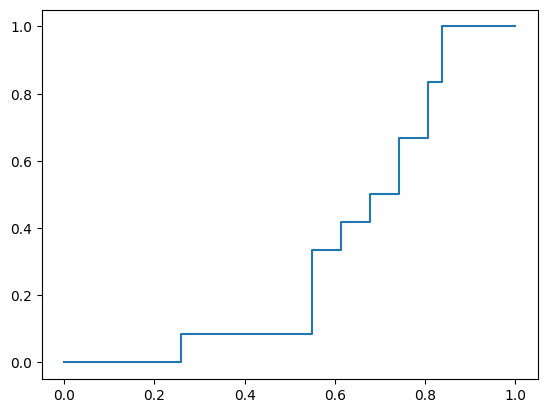

In [277]:
# Roc
from sklearn.metrics import roc_curve, RocCurveDisplay

preds = ovr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label=1)

plt.plot(fpr, tpr)

In [278]:
# Auc
from sklearn.metrics import auc
auc(fpr, tpr)

0.33602150537634407

__________________________

## Different Models Performance

In this section we are going to compare performance of different classifiers on our data.
#### 💭 Questions
- Define Models like `KNN`, `Gaussian Naive Bayes` which are inherently for multiclass classification and `logistic regression` by choosing the parameter `multi_class=multinomial`
- Use train data that you have splitted in the second section to train your models.
- predict labels for test data.
- evaluate your models using the metric that you have chosen for the last two sections.
- which model has the best performance?


**Write the answer below:** 

In [279]:
# define models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier()
nb = GaussianNB()
lr = LogisticRegression(max_iter=5000)

In [280]:
# Train Models
knn.fit(X_train, y_train)   
nb.fit(X_train, y_train)   
lr.fit(X_train, y_train)  

LogisticRegression(max_iter=5000)

In [281]:
# Evaluate models
from sklearn.metrics import accuracy_score

y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_lr = lr.predict(X_test)

print('knn:', accuracy_score(y_pred_knn, y_test))
print('nb:', accuracy_score(y_pred_nb, y_test))
print('lr:', accuracy_score(y_pred_lr, y_test))

knn: 0.5581395348837209
nb: 0.4418604651162791
lr: 0.627906976744186


______________________________

## Dealing with Imbalance Data

As you may have noticed up to now, the dataset that we have in this handsOn and the dataset that we had in the morning session are both imbalanced. Imbalanced datasets may often produce poor performance when running a Machine Learning model, although, in some cases the evaluation metrics produce good results. This can be due to the fact that the model is good at predicting the majority class, but it has poor performance while predicting the minority class. Since the evaluation metrics calculate the average value between the majority and minority classes, the final performance looks ok.

In this part of HandsOn we are going to introduce different techniques to deal with Imbalanced data.

### Random Undersampling
As the name suggests, random undersampling reduces the number of majority classes randomly down to the desired ratio against the minority class. This is probably the easiest way to undersample and can actually yield good results if there are a lot of the majority class instances that are close to each other.




#### 💭 Questions
- First you need to install an `imbalanced-learn` library to work with this section's methods.
- Use the method for `Random Under Sampling` from the library you have installed to under-sample the train data that you have Splitted in the second section.
- print the shape of train data after undersampling.
- Train models on the new resampled train data and evaluate your models on the test data from section two.
- Compare the performance with the models that you have trained on the imbalanced data. Is there any improvement?



**Write the answer below:** 

In [282]:
# pip install imblearn
! pip install imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [283]:
# Under sample
from imblearn.under_sampling import RandomUnderSampler

X_train_up, y_train_up = RandomUnderSampler().fit_resample(X_train, y_train)

In [284]:
# Print shape of data
print(X_train_up.shape)
print(y_train_up.shape)

(36, 9)
(36,)


In [285]:
# Train Models
knn.fit(X_train_up, y_train_up)   
nb.fit(X_train_up, y_train_up)   
lr.fit(X_train_up, y_train_up)  

y_pred_up_knn = knn.predict(X_test)
y_pred_up_nb = nb.predict(X_test)
y_pred_up_lr = lr.predict(X_test)


In [286]:
# Evaluate Models

print('knn:', accuracy_score(y_pred_up_knn, y_test))
print('nb:', accuracy_score(y_pred_up_nb, y_test))
print('lr:', accuracy_score(y_pred_up_lr, y_test))

knn: 0.5116279069767442
nb: 0.5116279069767442
lr: 0.4418604651162791


### Oversampling with SMOTE
For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is considered as one of the most popular and influential data sampling algorithms in ML and data mining. With SMOTE, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement.




#### 💭 Questions
- Use the method for `SMOTE` from the library you have installed to under-sample the train data that you have Splitted in the second section.
- print the shape of train data after oversampling.
- Train models on the new resampled train data and evaluate your models on the test data from section two.
- Compare the performance with the models that you have trained on the imbalanced data and when you have undersampled. Is there any improvement?


**Write the answer below:** 

In [287]:
! pip install -U threadpoolctl


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [288]:
# Oversampling 
from imblearn.over_sampling import SMOTE

X_train_op, y_train_op = SMOTE().fit_resample(X_train, y_train)

In [289]:
# Print shape of data
print(X_train_op.shape)
print(y_train_op.shape)

(348, 9)
(348,)


In [290]:
# Train Models
knn.fit(X_train_up, y_train_up)   
nb.fit(X_train_up, y_train_up)   
lr.fit(X_train_up, y_train_up)  

y_pred_op_knn = knn.predict(X_test)
y_pred_op_nb = nb.predict(X_test)
y_pred_op_lr = lr.predict(X_test)

In [291]:
# Evaluate Models
print('knn:', accuracy_score(y_pred_op_knn, y_test))
print('nb:', accuracy_score(y_pred_op_nb, y_test))
print('lr:', accuracy_score(y_pred_op_lr, y_test))

knn: 0.5116279069767442
nb: 0.5116279069767442
lr: 0.4418604651162791


___________________________

## Effect of Over-Sampling and Under Sampling

In this section we want to compare the effect of methods that we have used to deal with imbalanced datasets.
#### 💭 Questions
- plot a bar plot to compare the effect of methods we have used for balancing datasets. The x-axis of this plot must be classifiers in 3 conditions (imbalanced data, undersampling and oversampling) and the y-axis must be the metric that you have chosen to compare classifiers.


**Write the answer below:** 

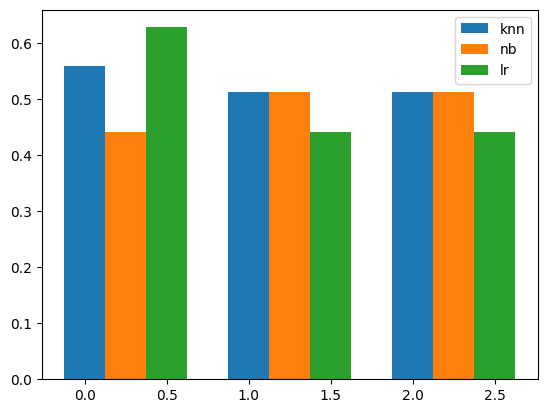

In [322]:
# Compare
import numpy as np

accuracy_scores_knn = [accuracy_score(y_pred_knn, y_test), accuracy_score(y_pred_up_knn, y_test), accuracy_score(y_pred_op_knn, y_test)]
accuracy_scores_nb = [accuracy_score(y_pred_nb, y_test), accuracy_score(y_pred_up_nb, y_test), accuracy_score(y_pred_op_nb, y_test)]
accuracy_scores_lr = [accuracy_score(y_pred_lr, y_test), accuracy_score(y_pred_up_lr, y_test), accuracy_score(y_pred_op_lr, y_test)]

x = np.arange(3)
plt.bar(x, accuracy_scores_knn, width=0.25, label='knn')
plt.bar(x+0.25, accuracy_scores_nb, width=0.25, label='nb')
plt.bar(x+0.5, accuracy_scores_lr, width=0.25, label='lr')
plt.legend()